# Report
* Objective
* Intro and background of the problem
* Data Collection
* Data Preprocessing
* Modelling and evaluation
* Results
* Conclusion



<div style="background-color: #007BFF; color: #ffffff; padding: 20px; text-align: center; font-family: 'Verdana', sans-serif; border-radius: 10px; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.3);">
    <h1 style="font-size: 40px; font-weight: bold; margin: 0; ">🧹 Data preprocessing & visualization 📊</h1>
</div>


In [17]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Loading dataset
df = pd.read_csv(r'C:\Users\hbc\OneDrive\Desktop\DM term project\Islamabad climate dataset.csv.csv')

In [3]:
df.shape

(988, 15)

In [4]:
df.head(2)

,[[,Unnamed: 0,daymonth_category,daymonth,weather,max_temp,min_temp,wind,rain,humidity,cloud,pressure,year,weathervalue,avg_temp
0,0,11/17/2020 11:29:59,01/01/2020,01/01/2020,Sunny,18.0,6.0,7.0,0.0,41.0,12.0,1024.0,2009.0,1.0,12.0
1,1,11/17/2020 11:30:39,01/01/2020,01/01/2020,Sunny,19.0,4.0,8.0,0.0,23.0,3.0,1019.0,2010.0,1.0,11.5



<div style="background-color: #007BFF; color: #ffffff; padding: 10px; font-family: 'Verdana', sans-serif; border-radius: 5px; box-shadow: 0px 0px 5px rgba(0, 0, 0, 0.3);">
    <h2 style="font-size: 24px; font-weight: bold; margin: 0;"> Data Preprocessing 🛠️</h2>
</div>


<div style="background: #FF8C00; color: #ffffff; padding: 8px 10px; font-family: 'Verdana', sans-serif; border-radius: 3px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h4 style="font-size: 18px; font-weight: bold; margin: 0; text-transform: uppercase; letter-spacing: 1px;"> 1. Data Cleaning🧹</h4>
</div>


<div style="text-align: left;">
    <span style="font-family: arial; padding: 5px; display: inline-block; border-radius: 20px 20px; background-color:#FFA500; font-size: 150%; font-weight: 150%; color: white; overflow: hidden; margin-left: 20px;">&nbsp; 1.1. Dropping irrelevant columns &nbsp;</span>
</div>


In [5]:
df.columns

Index(['[[', 'Unnamed: 0', 'daymonth_category', 'daymonth', 'weather',
       'max_temp', 'min_temp', 'wind', 'rain', 'humidity', 'cloud', 'pressure',
       'year', 'weathervalue', 'avg_temp'],
      dtype='object')

In [6]:
# Droping unnecessary columns:
df.drop(columns = ['[[', 'Unnamed: 0', 'daymonth_category', 'weathervalue'], inplace = True)

<div style="text-align: left;">
    <span style="font-family: arial; padding: 5px; display: inline-block; border-radius: 20px 20px; background-color:#FFA500; font-size: 150%; font-weight: 150%; color: white; overflow: hidden; margin-left: 20px;">&nbsp; 1.2. Correcting inconsistent data &nbsp;</span>
</div>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   daymonth  987 non-null    object 
 1   weather   986 non-null    object 
 2   max_temp  985 non-null    float64
 3   min_temp  986 non-null    float64
 4   wind      987 non-null    float64
 5   rain      986 non-null    float64
 6   humidity  987 non-null    float64
 7   cloud     985 non-null    float64
 8   pressure  986 non-null    float64
 9   year      987 non-null    float64
 10  avg_temp  985 non-null    float64
dtypes: float64(9), object(2)
memory usage: 85.0+ KB


In [8]:
# Converting year datatype from float to category
df['year'] = df['year'].astype('category')

In [9]:
# Converting rain values from float to int/boolean
# If value is greater than 0 its 1 or raining else 0 or not raining
df['rain'] = df['rain'].apply(lambda x:1 if x > 0 else 0)

In [10]:
# Converting daymonth column to date datatype
df['daymonth'] = pd.to_datetime(df['daymonth']).dt.date

<div style="text-align: left;">
    <span style="font-family: arial; padding: 5px; display: inline-block; border-radius: 20px 20px; background-color:#FFA500; font-size: 150%; font-weight: 150%; color: white; overflow: hidden; margin-left: 20px;">&nbsp; 1.3. Handling Duplicates values &nbsp;</span>
</div>

In [11]:
df.duplicated().sum()

136

In [12]:
# Droping duplicates values
df.drop_duplicates(inplace = True)

<br>

<div style="background: #FF8C00; color: #ffffff; padding: 8px 10px; font-family: 'Verdana', sans-serif; border-radius: 3px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h4 style="font-size: 18px; font-weight: bold; margin: 0; text-transform: uppercase; letter-spacing: 1px;"> 2. Handling Missing Values</h4>
</div>


<div style="text-align: left;">
    <span style="font-family: arial; padding: 5px; display: inline-block; border-radius: 20px 20px; background-color:#FFA500; font-size: 150%; font-weight: 150%; color: white; overflow: hidden; margin-left: 20px;">&nbsp; 2.1 Identifying missing values &nbsp;</span>
</div>

In [13]:
# Identifying missing values in evry columns
df.isnull().sum()

daymonth    1
weather     2
max_temp    3
min_temp    2
wind        1
rain        0
humidity    1
cloud       3
pressure    2
year        1
avg_temp    3
dtype: int64

<div style="text-align: left;">
    <span style="font-family: arial; padding: 5px; display: inline-block; border-radius: 20px 20px; background-color:#FFA500; font-size: 150%; font-weight: 150%; color: white; overflow: hidden; margin-left: 20px;">&nbsp; 2.2 Droping missing values &nbsp;</span>
</div>

In [14]:
# Droping missing values 
df.dropna(inplace = True)

<br>

<div style="background: #FF8C00; color: #ffffff; padding: 8px 10px; font-family: 'Verdana', sans-serif; border-radius: 3px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h4 style="font-size: 18px; font-weight: bold; margin: 0; text-transform: uppercase; letter-spacing: 1px;"> 3. Handling Outliers</h4>
</div>


<div style="text-align: left;">
    <span style="font-family: arial; padding: 5px; display: inline-block; border-radius: 20px 20px; background-color:#FFA500; font-size: 150%; font-weight: 150%; color: white; overflow: hidden; margin-left: 20px;">&nbsp; 3.1 Outliers detecion using Box Plot &nbsp;</span>
</div>

In [24]:
float_columns = df.select_dtypes(include=['float']).columns.tolist()
for col in float_columns:
    fig = px.box(df, x=col, title=f'Boxplot of {col.upper()}')
    fig.update_traces(marker=dict(color='skyblue', line=dict(color='darkblue', width=1)))
    fig.update_layout(title=dict(text=f'<b>{col.upper()}</b>', x=0.5, font=dict(size=18)),
                      xaxis=dict(title=col, showgrid=False),
                      yaxis=dict(title='Values', showgrid=False))
    fig.show()

<div style="text-align: left;">
    <span style="font-family: arial; padding: 5px; display: inline-block; border-radius: 20px 20px; background-color:#FFA500; font-size: 150%; font-weight: 150%; color: white; overflow: hidden; margin-left: 20px;">&nbsp; 3.2 Removing Outliers  &nbsp;</span>
</div>

In [25]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [26]:
for col in float_columns:
    df = remove_outliers_iqr(df, col)

<br>


<div style="background-color: #007BFF; color: #ffffff; padding: 10px; font-family: 'Verdana', sans-serif; border-radius: 5px; box-shadow: 0px 0px 5px rgba(0, 0, 0, 0.3);">
    <h2 style="font-size: 24px; font-weight: bold; margin: 0;"> Output column Rain Distribution</h2>
</div>


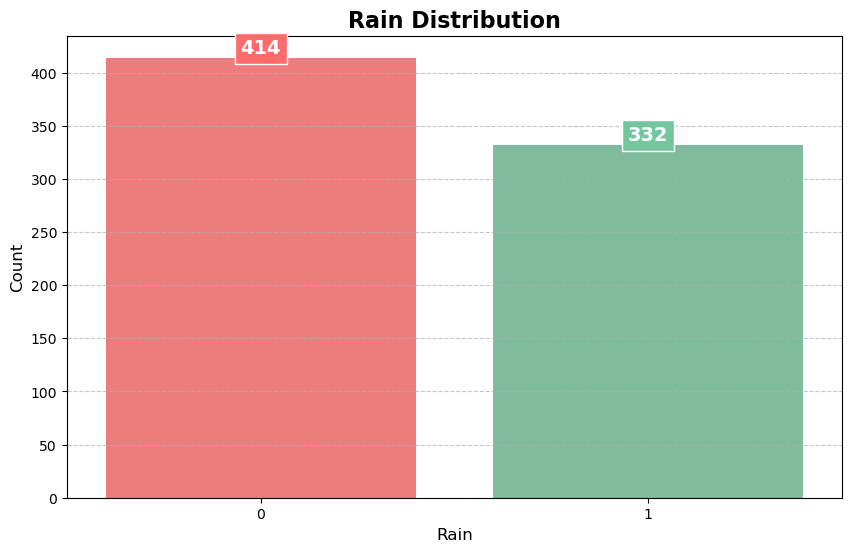

In [27]:
outcome_count = df['rain'].value_counts()

bar_colors = ['#FF6B6B', '#74C69D']  
text_box_colors = ['white', 'white']  
plt.figure(figsize=(10, 6))
sns.barplot(x=outcome_count.index, y=outcome_count.values, palette=bar_colors)
plt.title('Rain Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Rain', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, count in enumerate(outcome_count):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=14, fontweight='bold', color='white', bbox=dict(facecolor=bar_colors[i], edgecolor=text_box_colors[i], boxstyle='square'))

plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()